In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

%matplotlib inline

In [2]:
sess = tf.Session()

In [7]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

x2_matmul_A = tf.matmul(x2_data, A)
x2_matmul_A_add_b = tf.add(x2_matmul_A, b)
output = tf.subtract(x1_data, x2_matmul_A_add_b)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=y_target)
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(xentropy)
init = tf.global_variables_initializer()

sess.run(init)

for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i + 1) % 200 == 0:
        print('Step #{}: A={}, b={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b))))

Step #200: A=[[8.564594]], b=[[-3.6265728]]
Step #400: A=[[10.171554]], b=[[-4.7073374]]
Step #600: A=[[11.0957155]], b=[[-5.4251394]]
Step #800: A=[[11.8236065]], b=[[-5.9836636]]
Step #1000: A=[[12.397913]], b=[[-6.372309]]


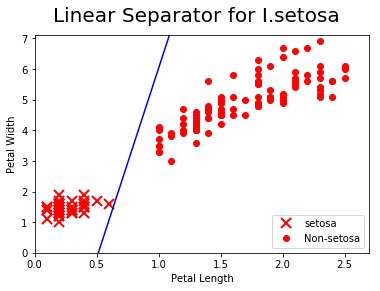

In [8]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
    ablineValues.append(slope*i+intercept)

setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator for I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()